In [ ]:
!pip install shap

import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

np.random.seed(2)

df= pd.read_csv('lidija2-NN3.csv', header=None)
#df.columns= ['O121', 'O122', 'C12', 'O131', 'O132', 'C13', 'O211', 'O212', 'C21', 'O231', 'O232', 'C23', 'O311', 'O312', 'C31', 'O321', 'O322', 'C32', 'predict']
df.columns= ['O12', 'O22', 'C2', 'O11', 'O21', 'C1', 'predict']


shap.initjs()

# target variable is 'predict' 
y= df['predict']
X= df.iloc[:,0:6]  # X = all rows and all columns but the last one

# split into training and test sets

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state= 2)

# build the model

model= xgb.XGBRegressor(
    n_estimators= 100,
    objective= 'reg:squarederror',
    learning_rate= 0.2,
    subsample= 0.7,
    max_depth= 5
)


model.fit(X_train, y_train)
explainer= shap.TreeExplainer(model)

print('molto bene')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 13.3 MB/s 


molto bene


In [ ]:
print (X_test.iloc[202])

O12    0.345
O22    0.497
C2     0.000
O11    0.343
O21    0.439
C1     0.000
Name: 280, dtype: float64


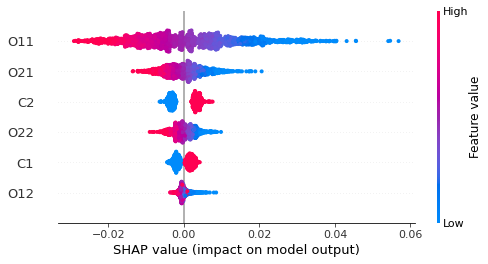

In [ ]:
import seaborn as sns

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.beeswarm(shap_values, show= False)
plt.savefig('3b.png', bbox_inches= 'tight')

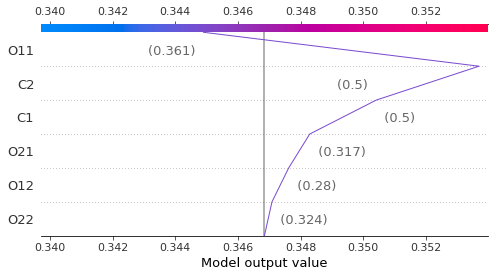

In [ ]:
# decision plot

#idx= 113  # 104 is coordinated but sum<= 1.0
#idx= 285  # subsidized
#idx= 102  # subsidized
idx= 231  # subsidized 
#idx= 49  # uncoordinated 
shap_values= explainer.shap_values(X.iloc[idx])

shap.decision_plot(explainer.expected_value, shap_values[0], X.iloc[idx,:], show=False)

plt.savefig('3s.png', bbox_inches='tight')
